In [23]:
r"""
아나콘다 프롬프트를 실행시켜서 konlpy에 필요한 패키지를 설치한다.
프롬프트에서 오류가 나오면 관리자 프롬프트에서 설치하면됨.
conda로 설치가 안되면 pip로 설치를 하면 됨.

conda install openjdk
pip install --upgrade pip
pip install jpype1
pip install konlpy

분명히 openjdk를 설치를 했는데 경로가 지정이 안된다고 나올경우에 경로 확인후 실행.
import os
if 'JAVA_HOME' not in os.environ:
    os.environ['JAVA_HOME']=r'C:\Users\q\Anaconda3\Library'
"""

"\n아나콘다 프롬프트를 실행시켜서 konlpy에 필요한 패키지를 설치한다.\n프롬프트에서 오류가 나오면 관리자 프롬프트에서 설치하면됨.\nconda로 설치가 안되면 pip로 설치를 하면 됨.\n\nconda install openjdk\npip install --upgrade pip\npip install jpype1\npip install konlpy\n\n분명히 openjdk를 설치를 했는데 경로가 지정이 안된다고 나올경우에 경로 확인후 실행.\nimport os\nif 'JAVA_HOME' not in os.environ:\n    os.environ['JAVA_HOME']=r'C:\\Users\\q\\Anaconda3\\Library'\n"

In [1]:
from konlpy.tag import Okt #Twitter가 이름이 바뀌었다고 나옴.
okt = Okt()

C:\Users\q\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [25]:
okt.pos("실행이 되네요. 야 기분좋다.", norm=True, stem=True)

[('실행', 'Noun'),
 ('이', 'Josa'),
 ('되다', 'Verb'),
 ('.', 'Punctuation'),
 ('야', 'Exclamation'),
 ('기분', 'Noun'),
 ('좋다', 'Adjective'),
 ('.', 'Punctuation')]

In [26]:
okt.pos("실행이 안되면 끝이 없어저 버리거든요.", norm=True, stem=True)

[('실행', 'Noun'),
 ('이', 'Josa'),
 ('안되다', 'Adjective'),
 ('끝', 'Noun'),
 ('이', 'Josa'),
 ('없다', 'Adjective'),
 ('저', 'Determiner'),
 ('버리다', 'Verb'),
 ('.', 'Punctuation')]

In [2]:
#읽기.
def readLines(fname):
    myfile = open(fname,"tr",encoding="utf-8")
    lines = myfile.read().splitlines()
    myfile.close()    
    return lines

lines = readLines("동백꽃.txt")

In [3]:
def Nouns( l ): #문장의 명사만 리스트로 리턴.
    exceptWords = (["점순"]) # (고유)명사의 목록.
    result = []
    for w in l.split():
        #print(w)
        replaced = False
        for exceptWord in exceptWords:
            if exceptWord in w:
                w=w.replace(exceptWord,'노무현') #일단 고유명사중 아무거나 사용.
                replaced = exceptWord
                break
        
        t = okt.pos( w , norm=True, stem=True) #기본형.        
        #print(t)
        for word, n in t:
            if n in ["Noun"]:
                if replaced:
                    word = word.replace('노무현',replaced)
                result.append(word)
    return result

# 명사가 출현한 빈도.
import collections
word_cnt = collections.Counter() 
for l in lines:
    word_cnt += collections.Counter(Nouns(l))

In [29]:
word_cnt.most_common(20)

[('것', 39),
 ('나', 35),
 ('닭', 30),
 ('점순', 25),
 ('그', 21),
 ('우리', 18),
 ('또', 16),
 ('수탉', 15),
 ('눈', 14),
 ('내', 13),
 ('집', 13),
 ('계집애', 12),
 ('이', 11),
 ('놈', 10),
 ('너', 10),
 ('제', 10),
 ('남', 8),
 ('울타리', 8),
 ('때', 7),
 ('두', 7)]

In [4]:
# 어미 조사 구두점을 제외하고 수집.
def collectingWord( okt, lines ):
    exceptWords = (["점순"]) # (고유)명사의 목록.
    result = []
    for l in lines:
        for w in l.split():
            #print(w)
            replaced = False
            for exceptWord in exceptWords:
                if exceptWord in w:
                    w=w.replace(exceptWord,'노무현') #일단 고유명사중 아무거나 사용.
                    replaced = exceptWord
                    break
            
            t = okt.pos( w , norm=True, stem=True) #기본형.        
            #print(t)
            for word, n in t:
                if n not in ["Josa","Emoi","Punctuation"]:
                    if replaced:
                        word = word.replace('노무현',replaced)
                    result.append(word)
    return result

result = collectingWord( okt, lines )
#" ".join(result)



In [31]:
for w in set(result):
    r = okt.pos( w , norm=True, stem=True) #기본형.
    print(r)

[('파묻히다', 'Verb')]
[('자다', 'Verb')]
[('퍼', 'PreEomi')]
[('손아귀', 'Noun')]
[('배냇', 'Noun'), ('병신', 'Noun')]
[('급기야', 'Adverb')]
[('큰일', 'Noun')]
[('후려', 'Noun'), ('쌔리', 'Noun')]
[('멈추다', 'Verb')]
[('지게', 'Noun')]
[('데', 'Noun')]
[('스르', 'Noun')]
[('내려가다', 'Verb')]
[('캐다', 'Verb')]
[('고치', 'Noun'), ('다', 'Josa')]
[('거지반', 'Noun')]
[('턱밑', 'Noun')]
[('내려다보다', 'Verb')]
[('불구', 'Noun')]
[('틀어막다', 'Verb')]
[('험상궂다', 'Adjective')]
[('쓰러지다', 'Verb')]
[('살다', 'Verb')]
[('돌부리', 'Noun')]
[('빼다', 'Verb')]
[('일', 'Noun')]
[('대강', 'Noun')]
[('하릴없이', 'Adverb')]
[('못', 'Noun')]
[('만큼', 'Noun')]
[('가무잡잡하다', 'Adjective')]
[('눕다', 'Verb')]
[('끼', 'Noun'), ('다', 'Josa')]
[('혼자', 'Noun')]
[('얼굴', 'Noun')]
[('치', 'Noun')]
[('온', 'Noun')]
[('모양', 'Noun')]
[('약', 'Noun')]
[('숨소리', 'Noun')]
[('횃속', 'Noun')]
[('막', 'Noun')]
[('뜻', 'Noun')]
[('조금', 'Noun')]
[('스럽다', 'Adjective')]
[('널', 'Noun')]
[('독', 'Noun')]
[('자빠지다', 'Verb')]
[('쌈', 'Noun')]
[('마련', 'Noun')]
[('풍기', 'Noun'), ('다', 'Josa')]
[('잡', 'Noun')]
[('

In [7]:
from gensim.models import word2vec

In [ ]:
#data = word2vec.LineSentence("\n".join(result))
#model =  word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model =  word2vec.Word2Vec([result], size=200, window=10, hs=1, min_count=2, sg=1, iter=10) #https://stackoverflow.com/a/51355252
model.save("동백꽃.model")

In [ ]:
model = word2vec.Word2Vec.load("동백꽃.model")

In [10]:
model.wv.most_similar(positive=["동백꽃"],topn=20)

[('쓰러지다', 0.9990957975387573),
 ('나', 0.9990454316139221),
 ('퍽', 0.9988232851028442),
 ('노랗다', 0.9987902641296387),
 ('내려가다', 0.998724102973938),
 ('위로', 0.9986996650695801),
 ('채', 0.9986549615859985),
 ('향', 0.998566210269928),
 ('어깨', 0.9985615015029907),
 ('치면', 0.9985293745994568),
 ('왜냐하면', 0.9985027313232422),
 ('맞다', 0.998475968837738),
 ('생각', 0.9984415769577026),
 ('속', 0.9984206557273865),
 ('후려치다', 0.998346745967865),
 ('게다가', 0.9983124136924744),
 ('하나', 0.9982433915138245),
 ('버리다', 0.9982149600982666),
 ('때문', 0.9981822371482849),
 ('새', 0.9981368184089661)]

In [12]:
model.wv.most_similar(positive=["점순"],topn=20)

[('준', 0.998738706111908),
 ('지내다', 0.9986481070518494),
 ('어머니', 0.9985917210578918),
 ('네', 0.9985002875328064),
 ('하', 0.9983533024787903),
 ('가다', 0.998288094997406),
 ('일', 0.9982813000679016),
 ('마르다', 0.9979353547096252),
 ('뭐', 0.9978623986244202),
 ('열', 0.9978485703468323),
 ('어딜', 0.9978218078613281),
 ('처음', 0.9977917075157166),
 ('있다', 0.9976763129234314),
 ('말', 0.9974335432052612),
 ('나오다', 0.9974252581596375),
 ('너', 0.997349202632904),
 ('소문', 0.9972792267799377),
 ('고자', 0.9972680807113647),
 ('가만히', 0.9972304105758667),
 ('오늘', 0.9972023963928223)]

In [14]:
model.wv.most_similar(positive=["어머니","아버지"],negative=[],topn=20)

[('열', 0.9992625117301941),
 ('말', 0.9990659952163696),
 ('고자', 0.9989359974861145),
 ('고개', 0.9989191293716431),
 ('지내다', 0.9987918734550476),
 ('뭐', 0.998781681060791),
 ('나오다', 0.9987264275550842),
 ('가다', 0.9986721873283386),
 ('정신', 0.9986446499824524),
 ('준', 0.9984774589538574),
 ('이의', 0.9984575510025024),
 ('양으로', 0.9984558820724487),
 ('일', 0.9983952641487122),
 ('오늘', 0.9983311295509338),
 ('마르다', 0.99831223487854),
 ('너', 0.9982977509498596),
 ('점순', 0.9982051849365234),
 ('감자', 0.9981734156608582),
 ('굽다', 0.998108983039856),
 ('들', 0.9980693459510803)]

In [15]:
model.wv.most_similar(positive=["우리"],negative=[],topn=20)

[('홰', 0.9990186095237732),
 ('제', 0.9988409876823425),
 ('어떻다', 0.998642086982727),
 ('이렇게', 0.9986173510551453),
 ('도로', 0.9985672831535339),
 ('요', 0.9984660148620605),
 ('패', 0.9984186887741089),
 ('이번', 0.9984056949615479),
 ('늘다', 0.9983980655670166),
 ('들어오다', 0.9983172416687012),
 ('때리다', 0.9982877373695374),
 ('집', 0.998278021812439),
 ('밑', 0.9981303811073303),
 ('웃다', 0.9981115460395813),
 ('그때', 0.9980990886688232),
 ('필연', 0.998078465461731),
 ('이의', 0.9980623126029968),
 ('들', 0.9980513453483582),
 ('개', 0.9979923367500305),
 ('들어서다', 0.9979856014251709)]

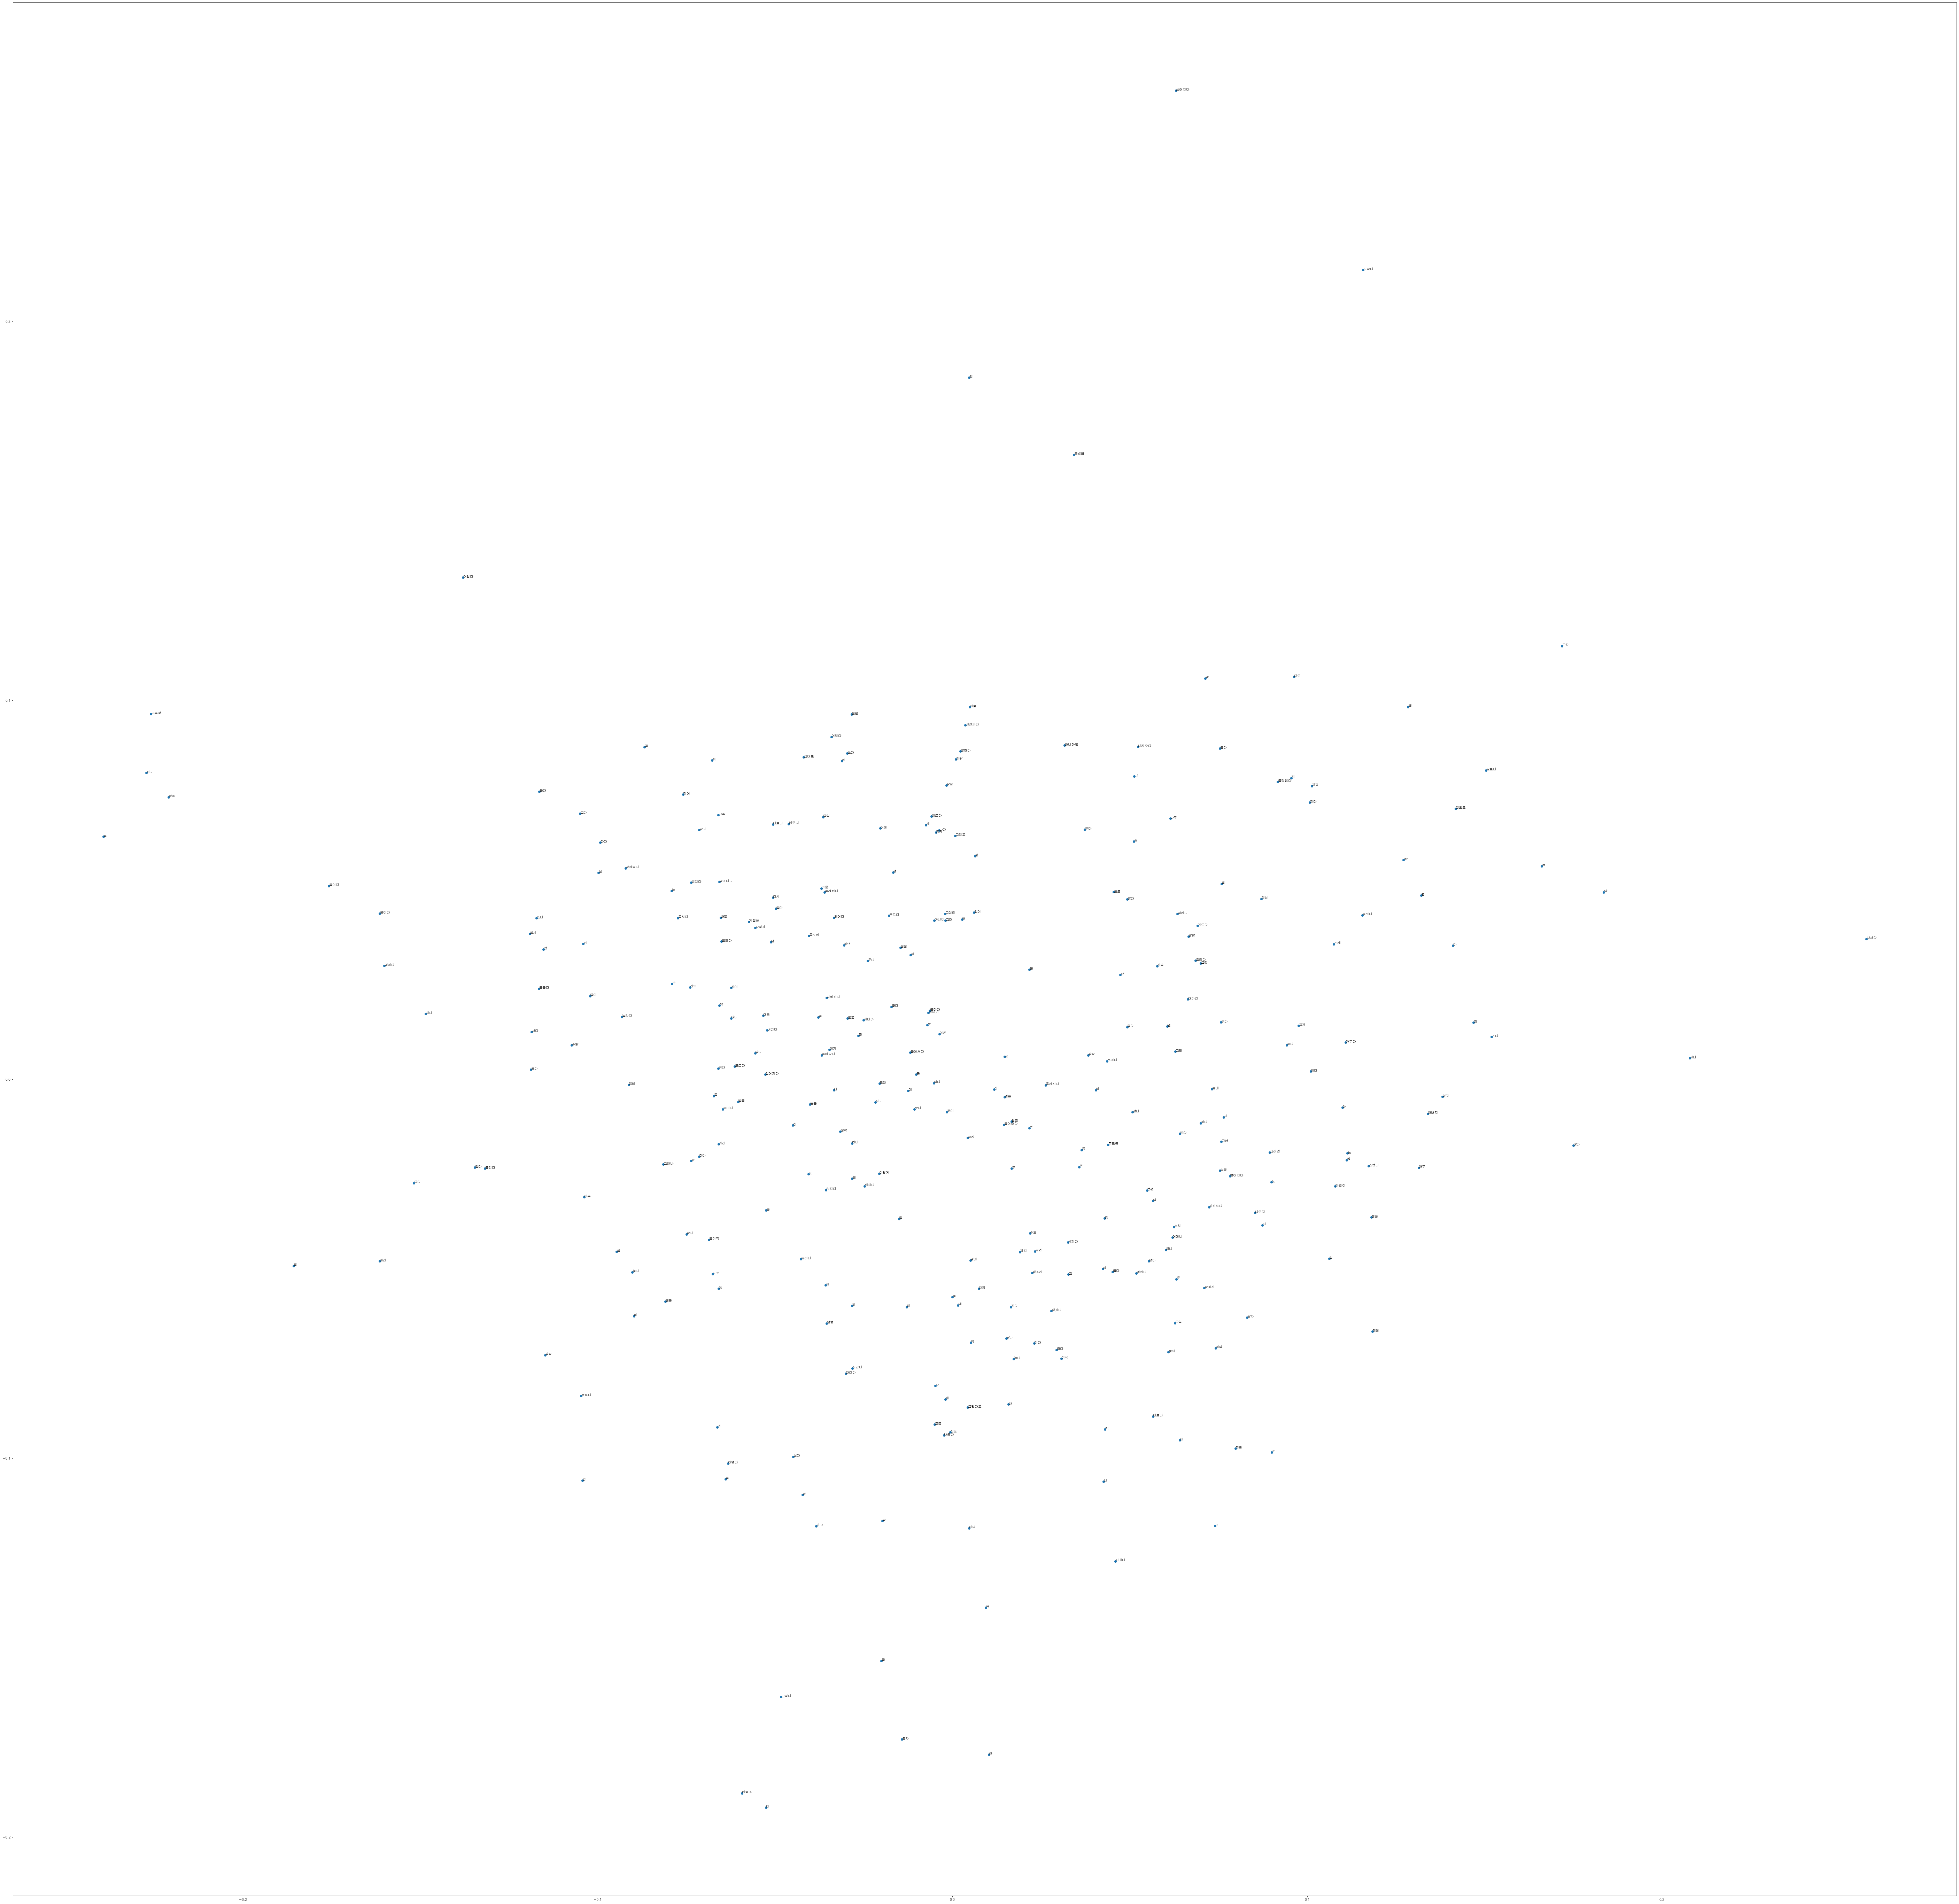

In [18]:
#단어들로 2차원 그래프를 그린다. https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221349385092&proxyReferer=https%3A%2F%2Fwww.google.com%2F
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
wv_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(wv_list)
xs = xys[:,0]
ys = xys[:,1]


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
#그래프에 한글이 나오게 글꼴을 바꾼다. https://programmers.co.kr/learn/courses/21/lessons/950
path = 'C:\\Windows\\Fonts\\gulim.ttc'
fontprop = fm.FontProperties(fname=path, size=18)    
plt.rc('font', family=fontprop.get_name())

def plot_2d_graph(vocabs, xs, ys):
    
    plt.figure(figsize=(100,100))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

plot_2d_graph(vocabs,xs,ys)